In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_files       
from keras.utils import to_categorical

In [2]:
len(os.listdir('data/lfw'))

5749

In [3]:
os.listdir('data/dog_images')

['test', 'train', 'valid']

In [4]:
len(os.listdir('data/dog_images/valid'))

133

In [5]:
check_folder = 'data/dog_images/train'
count = 0
for subfolder in os.listdir(check_folder):
    count += len(os.listdir(check_folder + '/' + subfolder))
count

6680

In [6]:
check_folder = 'data/dog_images/train'
count_dict = {}
for subfolder in os.listdir(check_folder):
    count_dict[subfolder.split('.')[1]] = len(os.listdir(check_folder + '/' + subfolder))


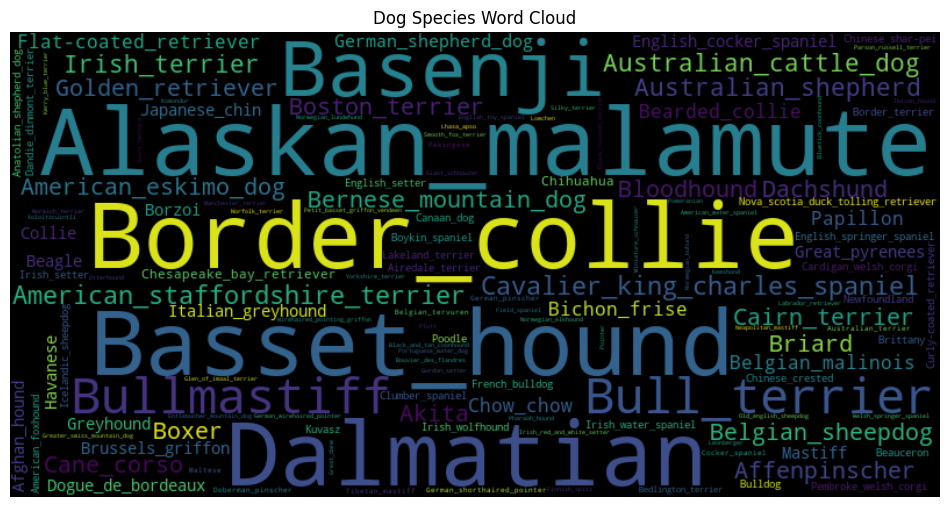

In [29]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(count_dict)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dog Species Word Cloud')
plt.show()


In [10]:
categories

[('Alaskan_malamute', 77),
 ('Border_collie', 74),
 ('Basset_hound', 73),
 ('Plott', 28),
 ('Norwegian_buhund', 26),
 ('Xoloitzcuintli', 26)]

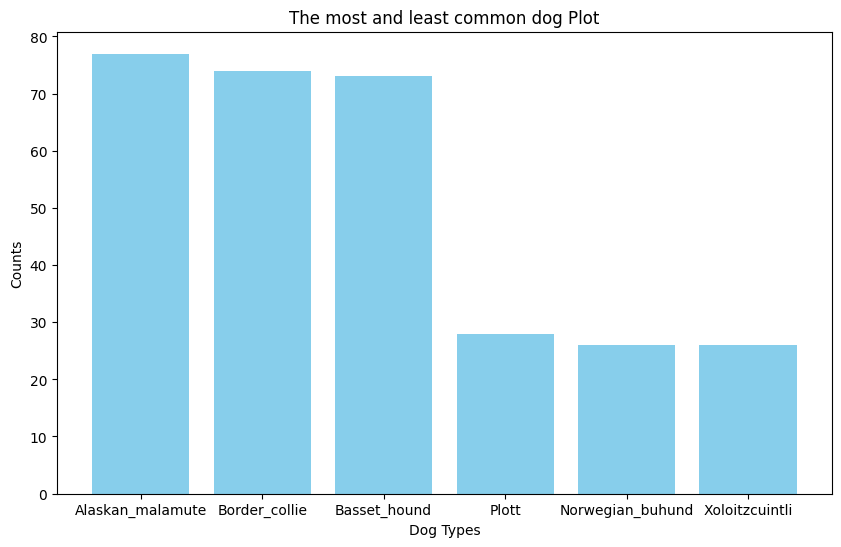

In [9]:
# Sort the dictionary by value
sorted_counts = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)

# Get the 3 most common and 3 least common categories
most_common = sorted_counts[:3]
least_common = sorted_counts[-3:]

# Combine the most common and least common
categories = most_common + least_common

# Separate categories and counts
category_names = [category for category, count in categories]
counts = [count for category, count in categories]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_names, counts, color='skyblue')
plt.xlabel('Dog Types')
plt.ylabel('Counts')
plt.title('The most and least common dog Plot')
plt.show()


In [23]:
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
test_Resnet50 = bottleneck_features['test']
test_Resnet50.shape

(836, 1, 1, 2048)

In [26]:
data = load_files('data/dog_images/test')
test_targets = data['target']
test_targets.shape

(836,)

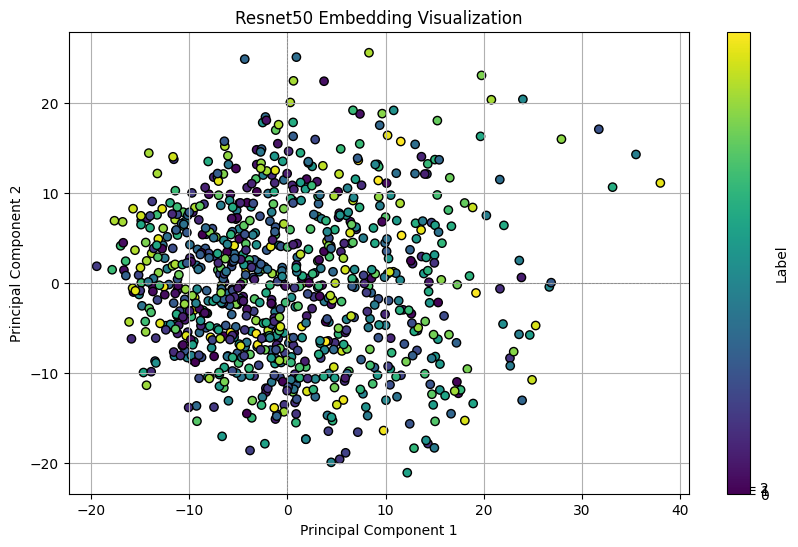

In [29]:
# Example data
# Assume X is your data matrix with shape (n_samples, n_features)
# Here, we create a random data matrix for demonstration
X = test_Resnet50.squeeze()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Extract the first two principal components
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

# Create a scatter plot with labels as colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pc1, pc2, c=test_targets, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Resnet50 Embedding Visualization')

# Add a color bar
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label('Label')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()